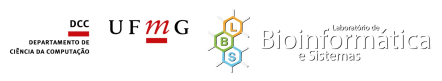

Federal University of Minas Gerais

Department of Computer Science

[Bioinformatics and Systems Laboratory](http://bioinfo.dcc.ufmg.br/)

Authors: Lucas Moraes and Prof. Dr. Raquel Cardoso de Melo-Minardi

In [ ]:
'''
This source code, developed in Python, was implemented to visualize some results specific to this research. The code presents,
for example, the model's performance in classifying MD trajectories, the correlation between model predictions and BFE changes
values (obtained from the TopNetTree application), and the model reliability estimate. This code has been used in the academic
and research context of the Department of Computer Science at the Federal University of Minas Gerais, specifically in the 
Bioinformatics and Systems Laboratory.
'''

In [1]:
# Define the base directory for the project. This directory is the root for all file operations.
# The base directory can be adjusted as needed for different environments or project structures.
base_dir = "./"

#### 1. Importing Libraries

In [2]:
# Importing Plotly for interactive plotting
import plotly as plt
from plotly import express as px

In [3]:
# Importing NumPy for numerical operations and Pandas for data manipulation
import numpy as np
import pandas as pd

In [4]:
# Importing Matplotlib for plotting and FontProperties for font customization
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

In [5]:
# Importing PIL (Python Imaging Library) for image processing tasks
from PIL import Image

#### 2. Molecular dynamics trajectories classification

In [6]:
# Function to create a bar plot visualizing the Recall and the False Positive Rate (FPR)
def barplot_affinity_prediction():
    
    # Sample data: classes and their performance metrics
    classes = ['$++$', '$--$']
    recall_values = [0.81, 0]
    false_positive_rate_values = [0, 0.32]
    recall_std = [0.13, 0]
    fpr_std = [0, 0.13]

    # Define Arial font properties
    font_properties = FontProperties(family='Arial', size=12)

    fig, ax1 = plt.subplots()

    # Setup the figure and first axis for the Recall values
    color = 'tab:orange'
    ax1.set_ylabel('Recall', color=color, fontproperties=font_properties)
    bars_recall = ax1.bar(classes, recall_values, color=color, yerr=recall_std, capsize=5, width=0.3)
    ax1.set_ylim(0, 1)  
    ax1.tick_params(axis='y', labelcolor=color)

    # Setup the second axis for the False Positive Rate values
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('False Positive Rate', color=color, fontproperties=font_properties)
    bars_fpr = ax2.bar(classes, false_positive_rate_values, color=color, yerr=fpr_std, capsize=5, width=0.3)
    ax2.set_ylim(0, 1)  
    ax2.tick_params(axis='y', labelcolor=color)

    # Applying font properties to all text in the plot
    for ax in [ax1, ax2]:
        for label in ax.get_xticklabels() + ax.get_yticklabels():
            label.set_fontproperties(font_properties)

    # Annotate bars with Recall values at the base of the bars
    for bar_recall, recall in zip(bars_recall, recall_values):
        if recall != 0:
            ax1.annotate(f'{recall:.2f}', (bar_recall.get_x() + bar_recall.get_width() / 2, 0), ha='center', va='bottom', color='white', fontproperties=font_properties)

    # Annotate bars with FPR values at the base of the bars
    for bar_fpr, fpr in zip(bars_fpr, false_positive_rate_values):
        if fpr != 0:
            ax2.annotate(f'{fpr:.2f}', (bar_fpr.get_x() + bar_fpr.get_width() / 2, 0), ha='center', va='bottom', color='white', fontproperties=font_properties)

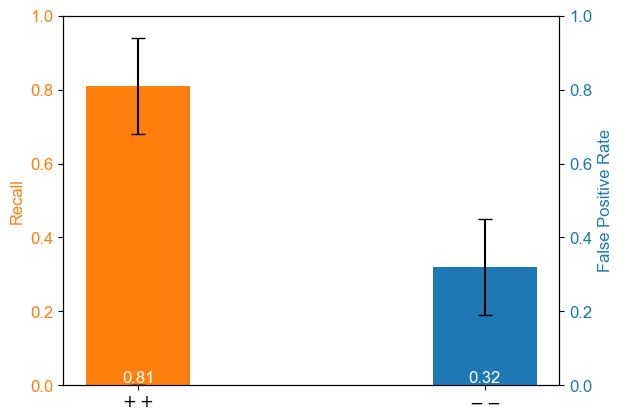

In [7]:
# Execute the function to display the bar plot
barplot_affinity_prediction()

#### 3. Correlation between model prediction and BFE changes

In [38]:
# Function to create a scatter plot showing the correlation between BFE changes and model predictions.
def scatter_correlacao():
    
    # Read CSV data, converting specific columns to float
    data = pd.read_csv(base_dir + 'data2.csv', delimiter=';')
    columns_to_convert = ['BFE_norm', 'Recall']
    data[columns_to_convert] = data[columns_to_convert].apply(lambda x: x.str.replace(',', '.').astype(float))

    # Creating the scatter plot with Plotly Express
    fig = px.scatter(data, x="BFE_norm", y="Recall", text="Mutation", size_max=80, color="Recall",
                     color_continuous_scale="balance", labels={'BFE_norm': "ΔΔG<sub>norm</sub> (kcal/mol)", 'Recall': "p\u0304"},
                     trendline="ols", trendline_color_override="lightgrey", template="simple_white")

    # Duplicate the plot for alternative labeling
    fig2 = px.scatter(data, x="BFE_norm", y="Recall", text="Mutation", size_max=80, color="Recall",
                      color_continuous_scale="balance", labels={'BFE_norm': "BFE Changes (kcal/mol)"},
                      trendline="ols", trendline_color_override="lightgrey")

    # Add the second plot to the first one
    font_color = 'rgb(60, 60, 60)'
    fig.add_trace(fig2.data[0])
    fig.update_traces(textposition='top right', marker_size=12, line_width=1, textfont=dict(family="Arial", size=20), textfont_color=font_color)
    
    # Customizing the plot appearance
    fig.update_layout(
        title=dict(y=0.95, x=0.5, xanchor='center', yanchor='top'),
        coloraxis_colorbar=dict(
            title="p\u0304",
            tickfont=dict(family='Arial', size=22),
            title_font_color=font_color
        ),
        xaxis=dict(range=[-0.05, 1.2]),
        xaxis_title_font=dict(family="Arial", size=22),
        yaxis_title_font=dict(family="Arial", size=26),
    )
    
    fig.update_xaxes(tickfont_family="Arial", tickfont_size=22, color=font_color)
    fig.update_yaxes(tickfont_family="Arial", tickfont_size=22, color=font_color)

    # Show the plot
    fig.show()

In [39]:
# Execute the function to display the scatter plot
scatter_correlacao()

#### 4.  Projection of the high-intensity pixels of the feature map onto the 3D structure of the RBD

In [23]:
# Function to calculate the vertical mean of pixel intensities in an image
def calculate_vertical_mean(image_path):
    
    # Load the image and convert to grayscale for processing
    image = Image.open(image_path)

    # Convert the image to a NumPy array
    image_array = np.array(image)

    return image_array

In [ ]:
# Example usage of the function with an image path
image_path = base_dir+'p1_c0.jpg'
image_array = calculate_vertical_mean(image_path)

# Demonstrating processing of image data with placeholder loop and print statements
i = 1
j = 0
k = 333
num_residues = 194

for j in range(num_residues):
    print("Resíduo: ",i, ((np.max(image_array[0:i,j,:], axis=0).astype(float))))
    i=i+1
    k=k+1

#### 5. Model reliability estimation

In [29]:
# Function to estimate and plot model reliability based on posterior probabilities
def estimated_probs():
    
    # Load and preprocess dataset    
    data = pd.read_csv(base_dir+'data3.csv', delimiter=',')
    data.sort_values('Probs')
    
    # Separate and sort data by prediction categories
    data_neutral = (data.iloc[0:5000]).query("Predictions == 'neutra'").sort_values('Probs')
    data_positive = (data.iloc[5001:10001]).query("Predictions == 'positiva'").sort_values('Probs')
    data_appended = pd.concat([data_neutral, data_positive], axis=0)
    
    # Create a line plot of estimated probabilities
    fig = px.line(data_appended, x=range(len(data_appended)), y=data_appended["Probs"],
             labels={'Probs':'<b>Estimated a Posterior Probabilities</b>','x':'<b>MD trajectories frames</b>'})
    
    # Customize plot layout
    fig.update_layout(
            title={
                'y':0.95,
                'x':0.5,
                'xanchor': 'center',
                'yanchor': 'top'},
            xaxis=dict(range=[0,10002]))
    
    fig.update_xaxes(tickfont_family="Arial Black")
    fig.update_yaxes(tickfont_family="Arial Black")

    fig.show()

In [ ]:
# Execute the function to display the model reliability estimation plot
estimated_probs()

![My Plot](Reliability.png)